## MXNet and Gluon

In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [4]:
image_url='https://image.shutterstock.com/image-photo/colorful-autumn-season-mountain-fuji-260nw-1321286417.jpg'
image_filepath='colorful-autumn-season-mountain-fuji-260nw-1321286417.jpg'
gcv.utils.download(url=image_url,path=image_filepath)

100%|██████████| 65/65 [00:00<00:00, 4739.99KB/s]

'colorful-autumn-season-mountain-fuji-260nw-1321286417.jpg'

In [5]:
image=mx.image.imread('colorful-autumn-season-mountain-fuji-260nw-1321286417.jpg')

In [6]:
print('type:',type(image))

type: <class 'mxnet.ndarray.ndarray.NDArray'>


In [7]:
print('shape',image.shape)

shape (280, 625, 3)


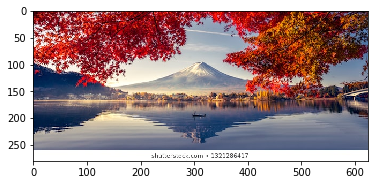

In [8]:
plt.imshow(image.asnumpy())

In [9]:
image=gcv.data.transforms.presets.imagenet.transform_eval(image)

In [10]:
print('shape',image.shape)

shape (1, 3, 224, 224)


In [11]:
network=gcv.model_zoo.get_model('ResNet50_v1d',pretrained=True)

  0%|          | 0/55463 [00:00<?, ?KB/s]

55464KB [00:01, 53433.35KB/s]                           


In [12]:
prediction=network(image)

In [13]:
print(prediction.shape)

(1, 1000)


In [15]:
prediction=prediction[0]

In [16]:
print(prediction.shape)

(1000,)


In [17]:
print(prediction[950:])


[ 0.8039505  -0.10958445  1.0553677   0.0510512   0.17047423 -0.26505816
  0.4667476   0.8189424   0.36400652  0.56968963  1.5465173   0.3368926
  0.99458754 -0.11579335  0.79614544 -0.3037732   1.2549199   0.05827573
  0.57607603  1.4608207   3.1082191   0.1073288   0.43951046  2.3637493
  1.5271206   6.6411624   2.5020454   1.7007844   4.3248453   2.8989778
  9.4611435  -0.20282449  0.18251501  0.05695927  0.41285723  0.5664366
  0.78784156 -0.5780786   0.6487591   0.6150267   0.68780845  0.1453828
 -0.41020077  0.88510597  0.63603854  1.2108405   0.53598064 -0.01541607
  0.47502962 -0.14328462]
<NDArray 50 @cpu(0)>


In [18]:
probability=mx.nd.softmax(prediction)

In [20]:
k=5
topk_indicies=mx.nd.topk(probability,k=k)
topk_indicies


[980. 975. 978. 970. 979.]
<NDArray 5 @cpu(0)>

In [25]:
network.classes[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [26]:
for i in range(k):
    class_index=topk_indicies[i].astype('int').asscalar()
    class_label=network.classes[class_index]
    class_probability=probability[class_index]
    print('#{}{}({:0.3}%)'.format(i+1,class_label,class_probability.asscalar()*100))

#1volcano(83.7%)
#2lakeside(4.99%)
#3seashore(0.492%)
#4alp(0.146%)
#5valley(0.118%)
